##Dociment Loading and Cleaning.


In [ ]:
from google.colab import files
uploaded = files.upload()

import zipfile
import os

with zipfile.ZipFile("ghana_policy_docs.zip", 'r') as zip_ref:
    zip_ref.extractall("ghana_policy_pdfs")


Saving ghana_policy_docs.zip to ghana_policy_docs.zip


In [ ]:

from pathlib import Path
pdf_folder = Path("ghana_policy_pdfs")
pdf_files = list(pdf_folder.glob("*.pdf"))

print(f"Found {len(pdf_files)} PDFs")


Found 36 PDFs


In [ ]:
from pathlib import Path

pdfs = list(Path("ghana_policy_pdfs").glob("*.pdf"))
for pdf in pdfs:
    print(pdf.name)


NFSP-Document-signed-and-launched.pdf
Health-Care-Waste-Management-Policy-and-Guidelines.pdf
TRADITIONAL-MEDICINE-POLICY.pdf
National-Medical-Oxygen-Policy.pdf
Health-Sector-ICT-Policy-and-Strategy.pdf
Occupational-Health-Safety-Policy-Guidelines-for-Health-Sector.pdf
HISSP_2022-2025_FINALVERSION-1.pdf
Nursing-and-Midwifery-Strategic-Plan-and-Services-Framework-2024-2028.pdf
National-Health-Insurance-Policy-framework.pdf
MOH_CHPS_Policy_Final.pdf
HEALTH-CARE-WASTE-MANAGEMENT-POLICY-Final.pdf
Health-Sector-Gender-Policy.pdf
Private-Health-Sector-Development-Policy.pdf
NHP_January-2020.pdf
CHPS-Operational-Policy-2005.pdf
2016-MAF-strategy-and-operational-plan-24-April-2016-for-MAF-SC-2nd-Draft-26042016.pdf
Human-Resource-Health-Policy-Plan.pdf
NAP_FINAL_PDF_A4_19.03.2018-SIGNED-1.pdf
NATIONAL-HEALTH-POLICY.pdf
Strategic-Action-Plam_National-Medical-Oxygen-Policy.pdf
Ghana-E-Health-120504121543.pdf
Ghana-NCD-Policy-2022.pdf
AMR-POLICY-A5_09.03.2018-Signed.pdf
Ghana-Final-Final.pdf
Ghana_

##Extract Pdfs to text so thay can be easlily indexed and embeddded


In [ ]:
!pip install pymupdf

import fitz
pdf_path = "ghana_policy_pdfs/TRADITIONAL-MEDICINE-POLICY.pdf"

def extract_text_from_pdf(pdf_path):
    try:
        doc = fitz.open(pdf_path)
        text = "\n".join([page.get_text() for page in doc])
        return text
    except Exception as e:
        print(f"Failed to extract {pdf_path}: {e}")
        return ""
text = extract_text_from_pdf(pdf_path)
print(text[:1000])


 
 
 
 
 
 
 
 
 
POLICY GUIDELINES 
 
 
 
ON 
 
 
 
TRADITIONAL MEDICINE DEVELOPMENT 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Ministry of Health 
 
 
 
 
 
 
 
 
2005 

 
1
TRADITIONAL MEDICINE POLICY 
 
Preface and Introduction 
 
In Ghana successive governments have recognized the importance of traditional 
medicine.  The formation of the Ghana Psychic and Traditional Healers Association in 
1961 and the establishment of the Centre for Scientific Research into Plant Medicine in 
1975 attest to this fact.  Also in 1991 the government established a unit for the 
coordination of Traditional Medicine (which is now Traditional and Alternative Medicine 
Directorate) which was followed by the setting up of the Food and Drugs Board in 1992, 
which among others, is to certify the sale of Traditional Medicine products to the public.  
In 2000, the government enacted the TMPC Act, Act 575 for the establishment of 
Traditional Medicine Council which is tasked with the responsibility for the r

##Clean Pdfs to exclude those with issues


In [ ]:
from pathlib import Path
import fitz

def extract_text_from_pdf(pdf_path):
    try:
        doc = fitz.open(pdf_path)
        text = "\n".join([page.get_text() for page in doc])
        return text
    except Exception as e:
        print(f" Failed: {pdf_path.name} | Error: {e}")
        return ""


pdf_folder = Path("ghana_policy_pdfs")
pdf_files = list(pdf_folder.glob("*.pdf"))


report = []

for pdf in pdf_files:
    text = extract_text_from_pdf(pdf)
    word_count = len(text.split())
    status = " OK" if word_count > 100 else "⚠️ Suspect or Empty"
    report.append((pdf.name, word_count, status))


print("\n=== PDF Extraction Report ===")
for name, wc, status in report:
    print(f"{name:<50} | {wc:>5} words | {status}")



❌ Failed: MOH_CHPS_Policy_Final.pdf | Error: Cannot open empty file: filename='ghana_policy_pdfs/MOH_CHPS_Policy_Final.pdf'.

=== PDF Extraction Report ===
NFSP-Document-signed-and-launched.pdf              | 10752 words | ✅ OK
Health-Care-Waste-Management-Policy-and-Guidelines.pdf | 14535 words | ✅ OK
TRADITIONAL-MEDICINE-POLICY.pdf                    |  3984 words | ✅ OK
National-Medical-Oxygen-Policy.pdf                 | 12555 words | ✅ OK
Health-Sector-ICT-Policy-and-Strategy.pdf          | 13343 words | ✅ OK
Occupational-Health-Safety-Policy-Guidelines-for-Health-Sector.pdf | 18967 words | ✅ OK
HISSP_2022-2025_FINALVERSION-1.pdf                 | 11815 words | ✅ OK
Nursing-and-Midwifery-Strategic-Plan-and-Services-Framework-2024-2028.pdf | 10460 words | ✅ OK
National-Health-Insurance-Policy-framework.pdf     |  7204 words | ✅ OK
MOH_CHPS_Policy_Final.pdf                          |     0 words | ⚠️ Suspect or Empty
HEALTH-CARE-WASTE-MANAGEMENT-POLICY-Final.pdf      |  9552 words |

In [ ]:
excluded_files = {
    "MOH_CHPS_Policy_Final.pdf",
    "Private-Health-Sector-Development-Policy.pdf",
    "CHPS-Operational-Policy-2005.pdf",
    "Ghana-NCD-Policy-2022.pdf",
    "Referral-Policy-Guidelines.pdf"
}


##Tried 3 Chunking Methods to compare which works best for my use Case


###Chunking with 300 word count(fixed word count)

In [ ]:
import fitz
from pathlib import Path
import json
import csv


def chunk_text(text, chunk_size=300):
    words = text.split()
    return [" ".join(words[i:i+chunk_size]) for i in range(0, len(words), chunk_size)]


excluded_files = {
    "MOH_CHPS_Policy_Final.pdf",
    "Private-Health-Sector-Development-Policy.pdf",
    "CHPS-Operational-Policy-2005.pdf",
    "Ghana-NCD-Policy-2022.pdf",
    "Referral-Policy-Guidelines.pdf"
}

pdf_folder = Path("ghana_policy_pdfs")
pdf_files = list(pdf_folder.glob("*.pdf"))

all_chunks = []
chunk_log = []

def extract_text_from_pdf(pdf_path):
    try:
        doc = fitz.open(pdf_path)
        return "\n".join([page.get_text() for page in doc])
    except Exception as e:
        print(f" Failed: {pdf_path.name} | Error: {e}")
        return ""

for pdf in pdf_files:
    name = pdf.name
    if name in excluded_files:
        print(f" Skipping excluded file: {name}")
        continue

    text = extract_text_from_pdf(pdf)
    word_count = len(text.split())

    if word_count < 100:
        print(f" Skipping {name} (too short: {word_count} words)")
        continue

    chunks = chunk_text(text, chunk_size=300)
    for i, chunk in enumerate(chunks):
        all_chunks.append({
            "source_file": name,
            "chunk_id": f"{name.replace('.pdf','')}_{i}",
            "text": chunk
        })


    avg_chunk_len = sum(len(c.split()) for c in chunks) / len(chunks)
    chunk_log.append({
        "doc": name,
        "chunk_method": "word_300",
        "chunks": len(chunks),
        "avg_chunk_len": round(avg_chunk_len, 2),
        "total_words": word_count
    })

print(f"\n Final chunk count: {len(all_chunks)}")


with open("rag_chunks_word300.jsonl", "w", encoding="utf-8") as f:
    for entry in all_chunks:
        f.write(json.dumps(entry) + "\n")


with open("chunking_log_word300.csv", "w", newline="") as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=chunk_log[0].keys())
    writer.writeheader()
    writer.writerows(chunk_log)

print(" Saved: rag_chunks_word300.jsonl and chunking_log_word300.csv")


 Skipping excluded file: MOH_CHPS_Policy_Final.pdf
 Skipping excluded file: Private-Health-Sector-Development-Policy.pdf
 Skipping excluded file: CHPS-Operational-Policy-2005.pdf
 Skipping excluded file: Ghana-NCD-Policy-2022.pdf
 Skipping excluded file: Referral-Policy-Guidelines.pdf

 Final chunk count: 1412
 Saved: rag_chunks_word300.jsonl and chunking_log_word300.csv


###Overlapping word Chunks

In [ ]:
import fitz
from pathlib import Path
import json
import csv


def chunk_text_overlap(text, chunk_size=300, overlap=100):
    words = text.split()
    step = chunk_size - overlap
    return [" ".join(words[i:i+chunk_size]) for i in range(0, len(words), step)]


excluded_files = {
    "MOH_CHPS_Policy_Final.pdf",
    "Private-Health-Sector-Development-Policy.pdf",
    "CHPS-Operational-Policy-2005.pdf",
    "Ghana-NCD-Policy-2022.pdf",
    "Referral-Policy-Guidelines.pdf"
}

pdf_folder = Path("ghana_policy_pdfs")
pdf_files = list(pdf_folder.glob("*.pdf"))


all_chunks = []
chunk_log = []

def extract_text_from_pdf(pdf_path):
    try:
        doc = fitz.open(pdf_path)
        return "\n".join([page.get_text() for page in doc])
    except Exception as e:
        print(f" Failed: {pdf_path.name} | Error: {e}")
        return ""

for pdf in pdf_files:
    name = pdf.name
    if name in excluded_files:
        print(f" Skipping excluded file: {name}")
        continue

    text = extract_text_from_pdf(pdf)
    word_count = len(text.split())
    if word_count < 100:
        print(f" Skipping {name} (too short: {word_count} words)")
        continue

    chunks = chunk_text_overlap(text)
    for i, chunk in enumerate(chunks):
        all_chunks.append({
            "source_file": name,
            "chunk_id": f"{name.replace('.pdf','')}_overlap_{i}",
            "text": chunk
        })

    avg_len = sum(len(c.split()) for c in chunks) / len(chunks)
    chunk_log.append({
        "doc": name,
        "chunk_method": "word_overlap_300_100",
        "chunks": len(chunks),
        "avg_chunk_len": round(avg_len, 2),
        "total_words": word_count
    })


with open("rag_chunks_overlap.jsonl", "w", encoding="utf-8") as f:
    for c in all_chunks:
        f.write(json.dumps(c) + "\n")

with open("chunking_log_overlap.csv", "w", newline="") as f:
    writer = csv.DictWriter(f, fieldnames=chunk_log[0].keys())
    writer.writeheader()
    writer.writerows(chunk_log)

print(f"\n Saved: rag_chunks_overlap.jsonl and chunking_log_overlap.csv")


⏩ Skipping excluded file: MOH_CHPS_Policy_Final.pdf
⏩ Skipping excluded file: Private-Health-Sector-Development-Policy.pdf
⏩ Skipping excluded file: CHPS-Operational-Policy-2005.pdf
⏩ Skipping excluded file: Ghana-NCD-Policy-2022.pdf
⏩ Skipping excluded file: Referral-Policy-Guidelines.pdf

 Saved: rag_chunks_overlap.jsonl and chunking_log_overlap.csv


###Sentence Based Chunking, tried NLTK,  NLTK failed to load punkt_tab and switched to Spacy

In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 47.6 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.5
    Uninstalling spacy-3.8.5:
      Successfully uninstalled spacy-3.8.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 86.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import fitz
from pathlib import Path
import json
import csv


nlp = spacy.load("en_core_web_sm")


def chunk_text_spacy_sentences(text, target_words=300):
    doc = nlp(text)
    chunks = []
    current_chunk = ""
    current_len = 0

    for sent in doc.sents:
        word_len = len(sent.text.split())
        if current_len + word_len > target_words:
            chunks.append(current_chunk.strip())
            current_chunk = sent.text + " "
            current_len = word_len
        else:
            current_chunk += sent.text + " "
            current_len += word_len

    if current_chunk.strip():
        chunks.append(current_chunk.strip())

    return chunks


excluded_files = {
    "MOH_CHPS_Policy_Final.pdf",
    "Private-Health-Sector-Development-Policy.pdf",
    "CHPS-Operational-Policy-2005.pdf",
    "Ghana-NCD-Policy-2022.pdf",
    "Referral-Policy-Guidelines.pdf"
}

pdf_folder = Path("ghana_policy_pdfs")
pdf_files = list(pdf_folder.glob("*.pdf"))

all_chunks = []
chunk_log = []


def extract_text_from_pdf(pdf_path):
    try:
        doc = fitz.open(pdf_path)
        return "\n".join([page.get_text() for page in doc])
    except Exception as e:
        print(f" Failed: {pdf_path.name} | Error: {e}")
        return ""

for pdf in pdf_files:
    name = pdf.name
    if name in excluded_files:
        print(f" Skipping excluded file: {name}")
        continue

    text = extract_text_from_pdf(pdf)
    word_count = len(text.split())
    if word_count < 100:
        print(f" Skipping {name} (too short: {word_count} words)")
        continue

    chunks = chunk_text_spacy_sentences(text)
    for i, chunk in enumerate(chunks):
        all_chunks.append({
            "source_file": name,
            "chunk_id": f"{name.replace('.pdf','')}_sentence_{i}",
            "text": chunk
        })

    avg_len = sum(len(c.split()) for c in chunks) / len(chunks)
    chunk_log.append({
        "doc": name,
        "chunk_method": "sentence_spacy_approx300",
        "chunks": len(chunks),
        "avg_chunk_len": round(avg_len, 2),
        "total_words": word_count
    })


with open("rag_chunks_sentence.jsonl", "w", encoding="utf-8") as f:
    for c in all_chunks:
        f.write(json.dumps(c) + "\n")

with open("chunking_log_sentence.csv", "w", newline="") as f:
    writer = csv.DictWriter(f, fieldnames=chunk_log[0].keys())
    writer.writeheader()
    writer.writerows(chunk_log)

print(f"\n Saved: rag_chunks_sentence.jsonl and chunking_log_sentence.csv")


 Skipping excluded file: MOH_CHPS_Policy_Final.pdf
 Skipping excluded file: Private-Health-Sector-Development-Policy.pdf
 Skipping excluded file: CHPS-Operational-Policy-2005.pdf
 Skipping excluded file: Ghana-NCD-Policy-2022.pdf
 Skipping excluded file: Referral-Policy-Guidelines.pdf

 Saved: rag_chunks_sentence.jsonl and chunking_log_sentence.csv


##Chunk log Comparison

,doc,chunk_method,chunks,avg_chunk_len,total_words,method
0,2016-MAF-strategy-and-operational-plan-24-Apri...,word_overlap_300_100,24,285.50,4626,overlap_300_100
1,2016-MAF-strategy-and-operational-plan-24-Apri...,sentence_spacy_approx300,17,272.12,4626,sentence_spacy_approx300
2,2016-MAF-strategy-and-operational-plan-24-Apri...,word_300,16,289.12,4626,word_300
3,AMR-POLICY-A5_09.03.2018-Signed.pdf,word_overlap_300_100,65,295.85,12865,overlap_300_100
4,AMR-POLICY-A5_09.03.2018-Signed.pdf,sentence_spacy_approx300,47,273.74,12865,sentence_spacy_approx300
...,...,...,...,...,...,...
88,Strategic-Action-Plam_National-Medical-Oxygen-...,sentence_spacy_approx300,49,267.18,13092,sentence_spacy_approx300
89,Strategic-Action-Plam_National-Medical-Oxygen-...,word_300,44,297.55,13092,word_300
90,TRADITIONAL-MEDICINE-POLICY.pdf,word_overlap_300_100,20,294.20,3984,overlap_300_100
91,TRADITIONAL-MEDICINE-POLICY.pdf,sentence_spacy_approx300,14,284.57,3984,sentence_spacy_approx300


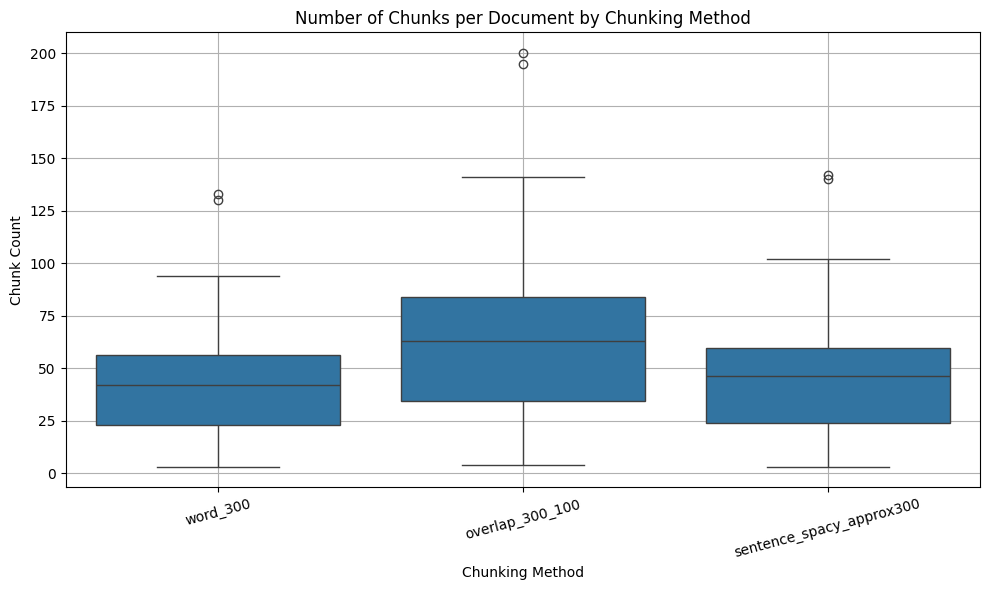

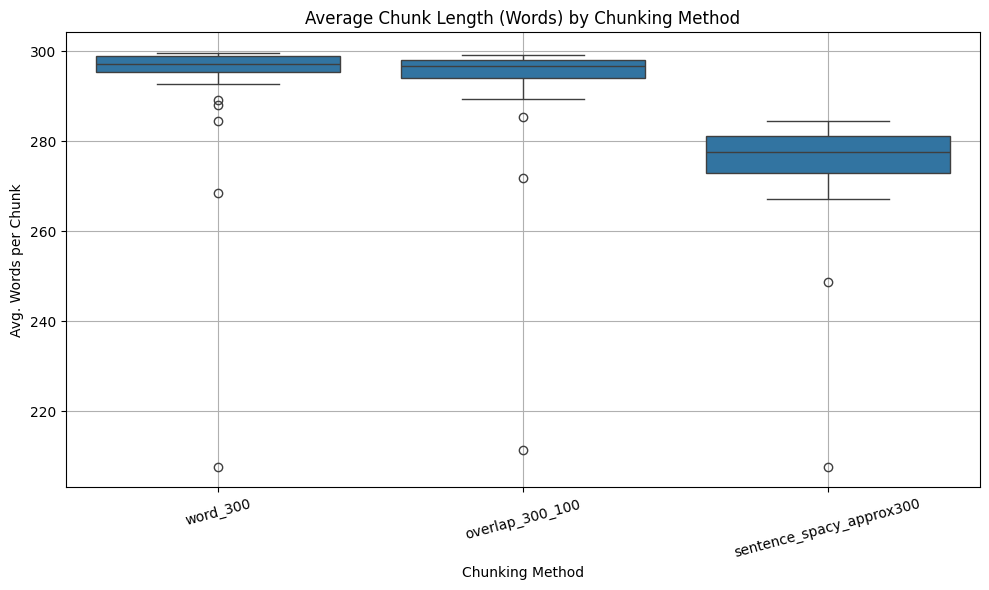

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


log_word = pd.read_csv("chunking_log_word300.csv")
log_overlap = pd.read_csv("chunking_log_overlap.csv")
log_sentence = pd.read_csv("chunking_log_sentence.csv")


log_word["method"] = "word_300"
log_overlap["method"] = "overlap_300_100"
log_sentence["method"] = "sentence_spacy_approx300"


combined_df = pd.concat([log_word, log_overlap, log_sentence], ignore_index=True)


display(combined_df.sort_values(by=["doc", "method"]).reset_index(drop=True))


plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x="method", y="chunks")
plt.title("Number of Chunks per Document by Chunking Method")
plt.ylabel("Chunk Count")
plt.xlabel("Chunking Method")
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x="method", y="avg_chunk_len")
plt.title("Average Chunk Length (Words) by Chunking Method")
plt.ylabel("Avg. Words per Chunk")
plt.xlabel("Chunking Method")
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()


##Gold AQ, as metrics


In [ ]:
import json

gold_qa = [

    {"question": "What is the impact of diarrhoea diseases on morbidity and mortality in Ghana?", "answer": "Diarrhoea diseases were the 4th leading cause of outpatient morbidity in Ghana in 2016, accounting for 7% of total cases. In 2017, they ranked 8th in causes of death, contributing to 1.4% of all deaths, with foodborne and waterborne diseases included in this category."},
    {"question": "What is the vision and goal of Ghana’s Health Care Waste Management (HCWM) policy?", "answer": "The vision of the HCWM policy is to ensure safe management of health care waste to protect health workers, clients, the public, and the environment. The goal is to provide direction for effective and safe HCW management using Best Available Techniques and Best Environmental Practices to prevent hazards and promote sustainable development."},
    {"question": "How does antibiotic use in animal husbandry contribute to resistance in Ghana?", "answer": "Antibiotic use for disease prevention and growth promotion in animal husbandry contributes to antimicrobial resistance, with antibiotic residues entering the food chain."},
    {"question": "What findings have been reported regarding antibiotic resistance in chicken meat in Ghana?", "answer": "Beta-lactamase producing E. coli and K. pneumoniae, as well as tetracycline residues, were found in chicken meat, indicating the presence of drug resistance."},
    {"question": "What evidence suggests unintended antibiotic consumption among people in Greater Accra?", "answer": "74.2% of healthy study subjects had detectable antimicrobials in their urine despite not knowingly consuming antibiotics, suggesting exposure from food or water sources."},
    {"question": "What drug is recommended in Ghana for treatment failure in uncomplicated malaria?", "answer": "Quinine is recommended as the drug of choice for treatment failure in uncomplicated malaria."},
    {"question": "What is Ghana’s malaria treatment policy for pregnant women in their first trimester?", "answer": "ACTs are not recommended in the first trimester, but may be used when life-saving and other antimalarials are unsuitable."},
    {"question": "What antimalarial options are recommended in the second and third trimesters of pregnancy?", "answer": "Quinine, Artesunate-Amodiaquine, or Artemether-Lumefantrine may be used depending on what medicine was used first."},
    {"question": "What is the role of Sulphadoxine-Pyrimethamine in Ghana’s antimalarial policy?", "answer": "Sulphadoxine-Pyrimethamine is reserved for Intermittent Preventive Treatment (IPT) in pregnant women under Directly Observed Treatment (DOT)."},
    {"question": "What screening is required before administering IPT to pregnant women in Ghana?", "answer": "Pregnant women must be screened for G6PD deficiency and sulphonamide allergy before starting IPT with Sulphadoxine-Pyrimethamine."}
]



with open("gold_qa.jsonl", "w", encoding="utf-8") as f:
    for item in gold_qa:
        f.write(json.dumps(item) + "\n")

print(" Saved gold_qa.jsonl with 2 entries")


 Saved gold_qa.jsonl with 2 entries


##Baseline  QA


In [ ]:
!pip install sentence-transformers faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
import json
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np


chunks = []
texts = []

with open("rag_chunks_word300.jsonl", "r", encoding="utf-8") as f:
    for line in f:
        item = json.loads(line)
        texts.append(item["text"])
        chunks.append(item)

print(f" Loaded {len(texts)} chunks.")


model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(texts, show_progress_bar=True)


dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(embeddings))
print(f" FAISS index built with {index.ntotal} vectors.")


 Loaded 1412 chunks.


Batches:   0%|          | 0/45 [00:00<?, ?it/s]

 FAISS index built with 1412 vectors.


In [ ]:
def retrieve_top_k(question, k=3):
    q_embedding = model.encode([question])
    D, I = index.search(np.array(q_embedding), k)
    top_chunks = [texts[i] for i in I[0]]
    return top_chunks


In [ ]:
from transformers import pipeline
import json


qa_model = pipeline("text2text-generation", model="google/flan-t5-base", max_length=256)


with open("gold_qa.jsonl", "r", encoding="utf-8") as f:
    gold_qa = [json.loads(line) for line in f]

baseline_results = []

for item in gold_qa:
    question = item["question"]
    answer = qa_model(question)[0]["generated_text"]
    baseline_results.append({
        "question": question,
        "gold_answer": item["answer"],
        "baseline_answer": answer
    })


with open("baseline_qa_results.jsonl", "w", encoding="utf-8") as f:
    for entry in baseline_results:
        f.write(json.dumps(entry) + "\n")


Device set to use cpu


##RAG Retriever + Generator


In [ ]:
from transformers import pipeline
import json
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np


with open("gold_qa.jsonl", "r", encoding="utf-8") as f:
    gold_qa = [json.loads(line) for line in f]


texts = []
with open("rag_chunks_word300.jsonl", "r", encoding="utf-8") as f:
    for line in f:
        item = json.loads(line)
        texts.append(item["text"])


model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(texts, show_progress_bar=True)


index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(np.array(embeddings))


def retrieve_top_k(query, k=3):
    query_embedding = model.encode([query])
    D, I = index.search(query_embedding, k)
    return [texts[i] for i in I[0]]


from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")

def truncate_by_tokens(question, context, max_tokens=480):
    input_text = f"question: {question} context: {context}"
    tokens = tokenizer.encode(input_text, truncation=True, max_length=max_tokens)
    truncated = tokenizer.decode(tokens, skip_special_tokens=True)
    return truncated


generator = pipeline("text2text-generation", model="google/flan-t5-base", max_length=256)


rag_results = []

for item in gold_qa:
    question = item["question"]
    context = " ".join(retrieve_top_k(question))
    prompt = truncate_by_tokens(question, context, max_tokens=480)  # ✅ Corrected here
    response = generator(prompt)[0]["generated_text"]

    rag_results.append({
        "question": question,
        "gold_answer": item["answer"],
        "rag_answer": response
    })


with open("rag_qa_results.jsonl", "w", encoding="utf-8") as f:
    for entry in rag_results:
        f.write(json.dumps(entry) + "\n")

print(" RAG answers regenerated and saved with token-safe input.")
from transformers import pipeline
import json
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np


with open("gold_qa.jsonl", "r", encoding="utf-8") as f:
    gold_qa = [json.loads(line) for line in f]


texts = []
with open("rag_chunks_word300.jsonl", "r", encoding="utf-8") as f:
    for line in f:
        item = json.loads(line)
        texts.append(item["text"])


model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(texts, show_progress_bar=True)


index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(np.array(embeddings))

# Retrieval function
def retrieve_top_k(query, k=3):
    query_embedding = model.encode([query])
    D, I = index.search(query_embedding, k)
    return [texts[i] for i in I[0]]

#   Token-based truncation function
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")

def truncate_by_tokens(question, context, max_tokens=480):
    input_text = f"question: {question} context: {context}"
    tokens = tokenizer.encode(input_text, truncation=True, max_length=max_tokens)
    truncated = tokenizer.decode(tokens, skip_special_tokens=True)
    return truncated


generator = pipeline("text2text-generation", model="google/flan-t5-base", max_length=256)

# Generate the RAG answers
rag_results = []

for item in gold_qa:
    question = item["question"]
    context = " ".join(retrieve_top_k(question))
    prompt = truncate_by_tokens(question, context, max_tokens=480)  # ✅ Corrected here
    response = generator(prompt)[0]["generated_text"]

    rag_results.append({
        "question": question,
        "gold_answer": item["answer"],
        "rag_answer": response
    })

with open("rag_qa_results.jsonl", "w", encoding="utf-8") as f:
    for entry in rag_results:
        f.write(json.dumps(entry) + "\n")

print("RAG answers regenerated and saved with token-safe input.")


Batches:   0%|          | 0/45 [00:00<?, ?it/s]

Device set to use cpu


✅ RAG answers regenerated and saved with token-safe input.


Batches:   0%|          | 0/45 [00:00<?, ?it/s]

Device set to use cpu


RAG answers regenerated and saved with token-safe input.


QA Evaluation

In [ ]:
import json
import pandas as pd


with open("baseline_qa_results.jsonl", "r", encoding="utf-8") as f:
    baseline_data = [json.loads(line) for line in f]

with open("rag_qa_results.jsonl", "r", encoding="utf-8") as f:
    rag_data = [json.loads(line) for line in f]


comparison = []
for base, rag in zip(baseline_data, rag_data):
    comparison.append({
        "question": base["question"],
        "gold_answer": base["gold_answer"],
        "baseline_answer": base["baseline_answer"],
        "rag_answer": rag["rag_answer"]
    })

df = pd.DataFrame(comparison)


def simple_score(gold, pred):
    gold = gold.lower()
    pred = pred.lower()
    if gold in pred or pred in gold:
        return 1, 0, 1
    elif any(word in gold for word in pred.split()):
        return 0.5, 0, 1
    else:
        return 0, 1, 1


df["baseline_accuracy"], df["baseline_hallucination"], df["baseline_fluency"] = zip(
    *df.apply(lambda row: simple_score(row["gold_answer"], row["baseline_answer"]), axis=1)
)
df["rag_accuracy"], df["rag_hallucination"], df["rag_fluency"] = zip(
    *df.apply(lambda row: simple_score(row["gold_answer"], row["rag_answer"]), axis=1)
)


from IPython.display import display
display(df)


agg_metrics = {
    "Metric": ["Accuracy", "Hallucination Rate", "Fluency"],
    "Baseline": [
        df["baseline_accuracy"].mean(),
        df["baseline_hallucination"].mean(),
        df["baseline_fluency"].mean()
    ],
    "RAG": [
        df["rag_accuracy"].mean(),
        df["rag_hallucination"].mean(),
        df["rag_fluency"].mean()
    ]
}

agg_df = pd.DataFrame(agg_metrics)
agg_df


,question,gold_answer,baseline_answer,rag_answer,baseline_accuracy,baseline_hallucination,baseline_fluency,rag_accuracy,rag_hallucination,rag_fluency
0,What is the impact of diarrhoea diseases on mo...,Diarrhoea diseases were the 4th leading cause ...,a decrease in the number of cases of diarrhea,1.4%,0.5,0,1,1.0,0,1
1,What is the vision and goal of Ghana’s Health ...,The vision of the HCWM policy is to ensure saf...,to reduce the number of wasteful healthcare ex...,improve waste management in health care facili...,0.5,0,1,0.5,0,1
2,How does antibiotic use in animal husbandry co...,Antibiotic use for disease prevention and grow...,a lack of access to clean water,inappropriate antimicrobial consumption,0.5,0,1,0.5,0,1
3,What findings have been reported regarding ant...,Beta-lactamase producing E. coli and K. pneumo...,a decrease in the number of chickens in the co...,high incidence of tetracycline residues was fo...,0.5,0,1,0.5,0,1
4,What evidence suggests unintended antibiotic c...,74.2% of healthy study subjects had detectable...,1. The prevalence of antibiotics in the commun...,Several studies carried out proved the existen...,0.5,0,1,0.5,0,1
5,What drug is recommended in Ghana for treatmen...,Quinine is recommended as the drug of choice f...,tamoxifen,ANTI-MALARIA DRUG POLICY FOR GHANA,0.0,1,1,0.5,0,1
6,What is Ghana’s malaria treatment policy for p...,ACTs are not recommended in the first trimeste...,a sex-free pregnancy,ACTs,0.5,0,1,1.0,0,1
7,What antimalarial options are recommended in t...,"Quinine, Artesunate-Amodiaquine, or Artemether...",a saline solution,Intramuscular Artemether injection,0.5,0,1,0.5,0,1
8,What is the role of Sulphadoxine-Pyrimethamine...,Sulphadoxine-Pyrimethamine is reserved for Int...,a sulphate of sulphate,reserved solely for use in Intermittent Preven...,0.5,0,1,0.5,0,1
9,What screening is required before administerin...,Pregnant women must be screened for G6PD defic...,a Pap smear,G-6PD deficient or allergic to sulphonamides,0.5,0,1,0.5,0,1


,Metric,Baseline,RAG
0,Accuracy,0.45,0.6
1,Hallucination Rate,0.10,0.0
2,Fluency,1.00,1.0


##Final Viasualitons for RAG

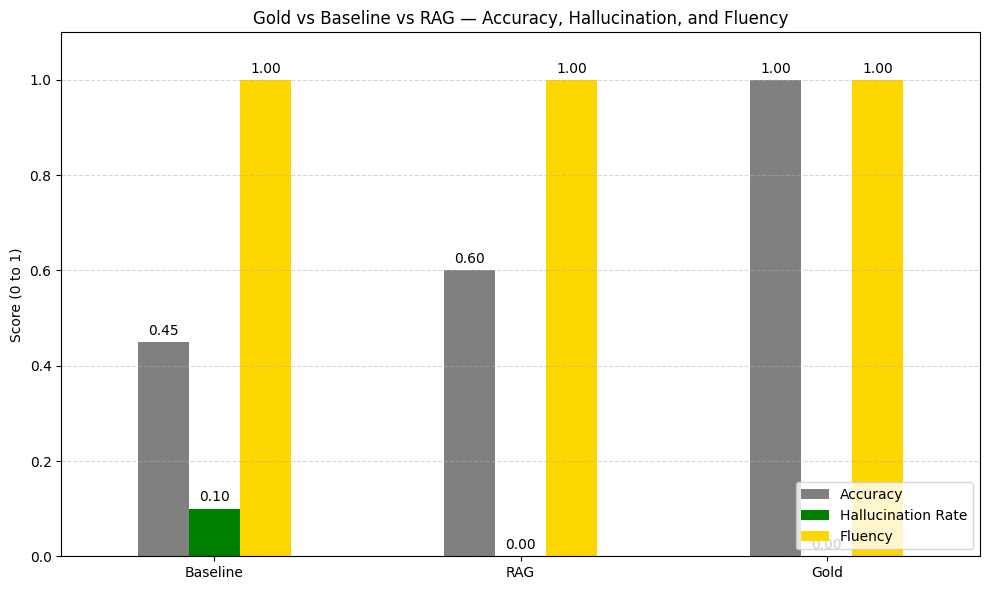

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import json


with open("baseline_qa_results.jsonl", "r", encoding="utf-8") as f:
    baseline_data = [json.loads(line) for line in f]
with open("rag_qa_results.jsonl", "r", encoding="utf-8") as f:
    rag_data = [json.loads(line) for line in f]


comparison = []
for base, rag in zip(baseline_data, rag_data):
    comparison.append({
        "question": base["question"],
        "gold_answer": base["gold_answer"],
        "baseline_answer": base["baseline_answer"],
        "rag_answer": rag["rag_answer"]
    })
df = pd.DataFrame(comparison)


def simple_score(gold, pred):
    gold = gold.lower()
    pred = pred.lower()
    if gold in pred or pred in gold:
        return 1, 0, 1
    elif any(word in gold for word in pred.split()):
        return 0.5, 0, 1
    else:
        return 0, 1, 1


df["baseline_accuracy"], df["baseline_hallucination"], df["baseline_fluency"] = zip(
    *df.apply(lambda row: simple_score(row["gold_answer"], row["baseline_answer"]), axis=1)
)
df["rag_accuracy"], df["rag_hallucination"], df["rag_fluency"] = zip(
    *df.apply(lambda row: simple_score(row["gold_answer"], row["rag_answer"]), axis=1)
)

# Metric summary
summary = {
    "Accuracy": [
        df["baseline_accuracy"].mean(),
        df["rag_accuracy"].mean(),
        1.0
    ],
    "Hallucination Rate": [
        df["baseline_hallucination"].mean(),
        df["rag_hallucination"].mean(),
        0.0
    ],
    "Fluency": [
        df["baseline_fluency"].mean(),
        df["rag_fluency"].mean(),
        1.0
    ]
}


metrics_df = pd.DataFrame(summary, index=["Baseline", "RAG", "Gold"])


ax = metrics_df.plot(kind="bar", figsize=(10, 6), color=["gray", "green", "gold"])
plt.title("Gold vs Baseline vs RAG — Accuracy, Hallucination, and Fluency")
plt.ylabel("Score (0 to 1)")
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(loc="lower right")


for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)


plt.tight_layout()
plt.savefig("performance_vs_gold_chart.png", dpi=300)
plt.show()
